<a href="https://colab.research.google.com/github/taru4u3/NeuralNetzwerk/blob/main/check_credit_staus_fullypaid_chargedoff_real_praxis_feature_engineering_heavy_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Download first csv which contains column names with description

In [88]:
data_info = pd.read_csv('./lending_club_info.csv',index_col='LoanStatNew')
#index_col : int or sequence, default 0
#defines which Column to use for index.

In [89]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [90]:
print(data_info.loc['term']['Description'])

The number of payments on the loan. Values are in months and can be either 36 or 60.


Define a function, that is handy to read description of any column

In [91]:
def feature_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [92]:
feature_info('grade')

LC assigned loan grade


Download second csv containing the column data

In [93]:
df = pd.read_csv('./lending_club_loan_two.csv')

In [94]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<Axes: xlabel='loan_status', ylabel='count'>

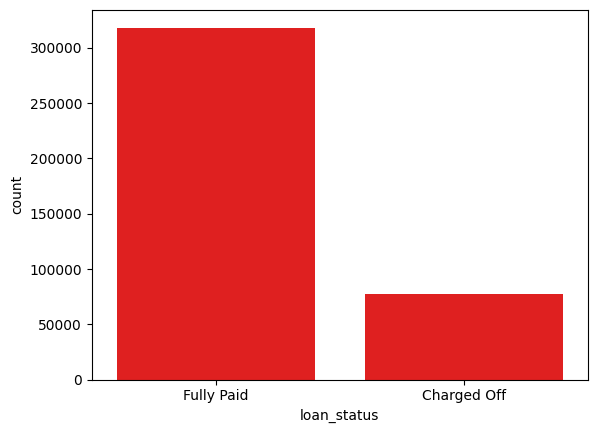

In [96]:
sns.countplot(x=df['loan_status'], color='r')

Make loan_status as numeric feature so that we can use it to check its correlation with other features

<ipython-input-97-df002da5e9a7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'])


<Axes: xlabel='loan_amnt', ylabel='Density'>

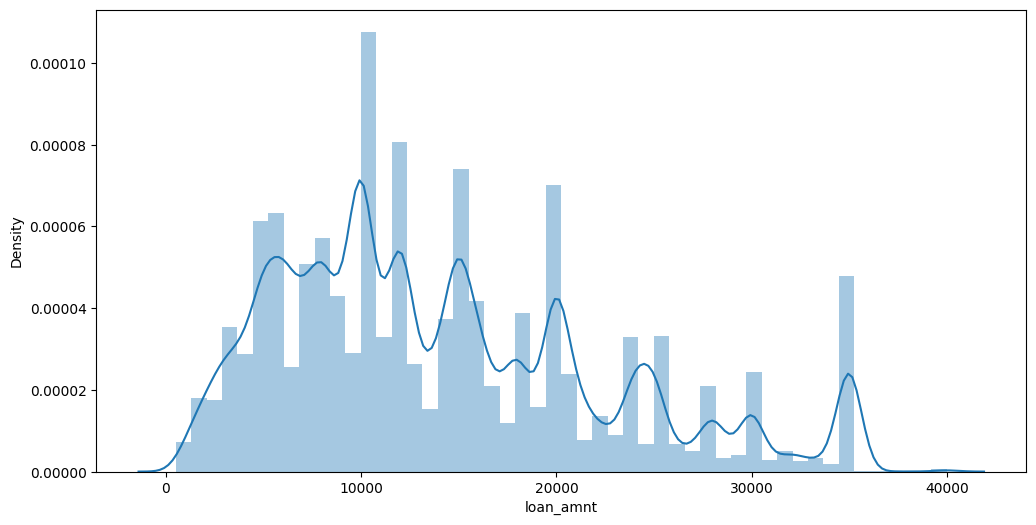

In [97]:
# Next let us check how loan_amount is distributed
plt.figure(figsize=(12,6))
sns.distplot(df['loan_amnt'])

<Axes: xlabel='loan_amnt', ylabel='installment'>

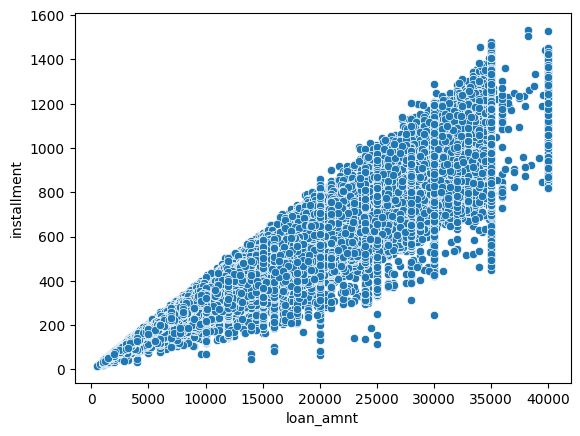

In [98]:
# Next let us check if loan_amount increases do installments increases
sns.scatterplot(x='loan_amnt',y='installment',data=df)

<Axes: xlabel='loan_status', ylabel='int_rate'>

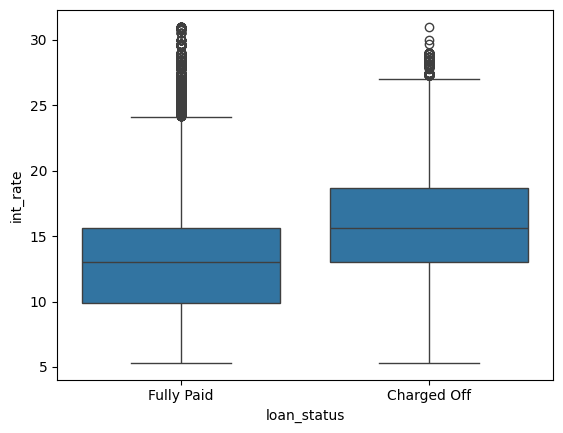

In [99]:
# As we see interest rate is highly coorelated with loan status so lets see
sns.boxplot(x='loan_status',y='int_rate',data=df)
# indeed, interest_rate has an impact on loan_status, ppl with lower interest rate have paid compared to ppl with higher interest rate

In [100]:
feature_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [101]:
print(feature_info('dti'))

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
None


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

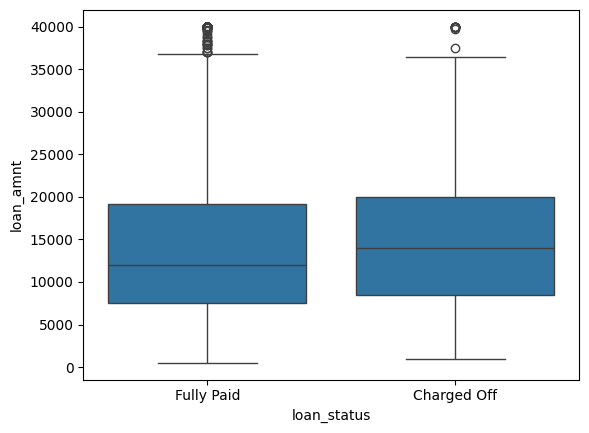

In [102]:
# Let us see if loan_amnt plays a role in determining loan_status
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
# doesnt look like loan was fullypaid if loan amount was low or high, it has no significant impact

AUFGABE: Berechne die zusammengefassten Statistiken für die Höhe des Kredites, gruppiert nach loan_status.

In [103]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


# Part 2: Data Preprocessing
Now let us focus on feature engineering

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [105]:
# Let us dig into object data types

<Axes: xlabel='grade', ylabel='count'>

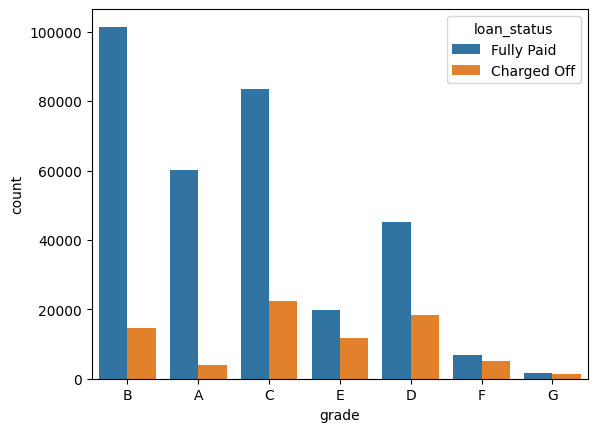

In [106]:
sns.countplot(x=df['grade'].sort_values(),hue=df['loan_status'])
# it looks like the class F and G has not paid off loan often

<Axes: xlabel='sub_grade', ylabel='count'>

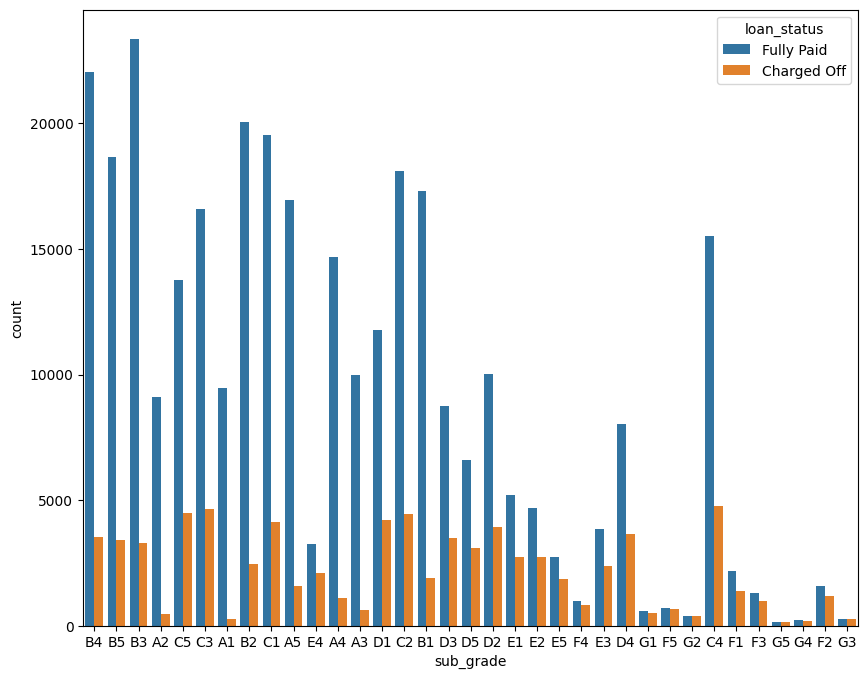

In [107]:
plt.figure(figsize = (10,8))
sns.countplot(x=df['sub_grade'].sort_values(),hue=df['loan_status'])

Grade is incorporated in subgrade in great detail, so let us remove grade and convert subgrade using one hot encoding

In [108]:
df.drop('grade',axis=1,inplace=True)

In [109]:
# one hot encoding
sub_grade = pd.get_dummies(df['sub_grade' ], drop_first=True)

In [110]:
df = pd.concat([df, sub_grade], axis=1)

In [111]:
df.drop('sub_grade',axis=1,inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 59 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_title             373103 non-null  object 
 5   emp_length            377729 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  title                 394275 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

# Deal with null values and other object types

In [113]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
A2                          0
A3                          0
A4                          0
A5                          0
B1                          0
B2                          0
B3                          0
B4                          0
B5        

In [114]:
  df['emp_title'].value_counts()
  # Looks like there are too many titles and we cannot fill it for null values + we assume they dont play a role in determining loan status we drop it

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [115]:
df.drop('emp_title',axis=1, inplace=True)

<Axes: xlabel='emp_length', ylabel='count'>

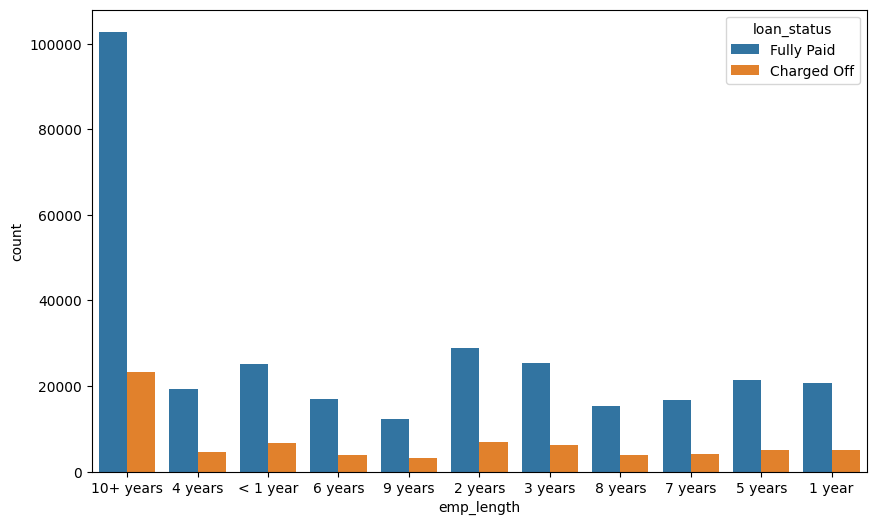

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['emp_length'],hue=df['loan_status'])

CHALLENGE: This still gives us insufficient information as to whether there is a strong relationship between length of employment and repayment, we need the percentage of repayment per category. This means we know what percentage of borrowers per job category have not repaid their loan. There are a variety of ways to create this series. After you have created it, display it as a barplot. This might be difficult, take a look at the solution notebook for problems with creating the series.

In [117]:
#(df.groupby('emp_length')['loan_repaid'].count()) / len(df[df['loan_repaid']==1 ])
emp_fp = df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

In [118]:
emp_co = df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']

In [119]:
emp_len = emp_co / emp_fp

<Axes: xlabel='emp_length'>

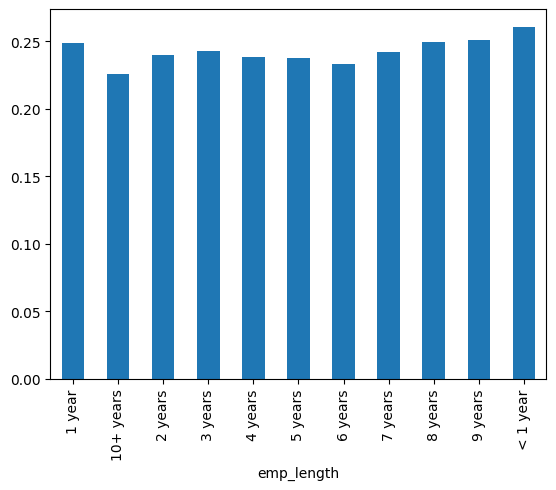

In [120]:
emp_len.plot(kind = 'bar')

Conclusion : The repayment rates across all categories are extremely similar. Discard the emp_length column as it does not bring any value

In [121]:
df.drop('emp_length',axis=1, inplace = True)

In [122]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
A2                          0
A3                          0
A4                          0
A5                          0
B1                          0
B2                          0
B3                          0
B4                          0
B5                          0
C1                          0
C2        

Let us now check the columns title and purpose

In [123]:
df['title' ].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [124]:
df['purpose' ].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

Conclusion : Title and purpose are similar, so discard title and we will deal with purpose later

In [125]:
df.drop('title',axis=1,inplace=True)

Let us focus on mort_acc missing values. Let us check which which column is mort_acc highly coorelated

In [126]:
df.corr()['mort_acc'].sort_values(ascending=False)

<ipython-input-126-c591a4eea948>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values(ascending=False)


mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
A3                      0.037614
A5                      0.034348
A2                      0.033989
A4                      0.030061
pub_rec_bankruptcies    0.027239
B1                      0.021905
B2                      0.016405
pub_rec                 0.011552
revol_util              0.007514
G4                      0.000573
G3                     -0.001184
B3                     -0.001862
G1                     -0.002122
B4                     -0.002867
G5                     -0.003116
F1                     -0.003825
F2                     -0.004588
F5                     -0.004676
G2                     -0.005108
C5                     -0.005682
F4                     -0.006316
E2                     -0.006473
E4                     -0.006782
F3        

In [127]:
df[['total_acc','mort_acc']]

,total_acc,mort_acc
0,25.0,0.0
1,27.0,3.0
2,26.0,0.0
3,13.0,0.0
4,43.0,1.0
...,...,...
396025,23.0,0.0
396026,8.0,1.0
396027,23.0,0.0
396028,20.0,5.0


HERAUSFORDERUNG: Lasst uns die fehlenden Werte von mort_acc basierend auf deren total_acc-Werten ersetzen. Wenn mort_acc fehlt, ersetzen wir den fehlenden Wert mit dem Durchschnitt entsprechend des total_acc-Wertes aus der oben erzeugten Series. Dies beinhaltet die Anwendung der .apply()-Methode mit zwei Spalten. Beachte den folgenden Link für mehr Informationen, oder wirf einen Blick in das Video/Lösungsnotebook.

In [128]:
print("Mean of mort_acc column per total_acc")
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

Mean of mort_acc column per total_acc


In [129]:
total_acc_avg[19.0]

1.3580128970623357

In [130]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.

    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [131]:
#df['mort_acc' ] = df.apply(lambda x : fill_mort_acc(x['total_acc'], x['mort_acc' ]),axis=1 )
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [132]:
df.isnull().sum() / len(df)* 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
A2                      0.000000
A3                      0.000000
A4                      0.000000
A5                      0.000000
B1                      0.000000
B2                      0.000000
B3                      0.000000
B4                      0.000000
B5        

revol_util              0.069692
pub_rec_bankruptcies    0.135091
The above two cols have null values but they are so less in perc we can just drop the null value rows

In [133]:
df = df.dropna()

# Kategorische Variablen und Dummyvariablen

In [134]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

AUFGABE: Konvertiere diese Dummyvariablen, aber ersetze NONE und ANY mit OTHER, so dass wir nur 4 Kategorien erhalten, MORTGAGE, RENT, OWN, OTHER. Füge sie dann dem originalen DataFrame hinzu. Verwende drop_first=True und verwirf die ursprünglichen Spalten.

In [135]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x =='ANY' else x )

In [136]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x == 'NONE' else x )

In [137]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [138]:
home_ownership = pd.get_dummies(df['home_ownership'],drop_first=True)

In [139]:
df = pd.concat([ df,home_ownership ],axis=1)

In [140]:
# convert term into int by extracting first 2 digits 36 or 60
df['term'] = df['term'].apply(lambda s: int(s[:3]))


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 59 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   home_ownership        395219 non-null  object 
 5   annual_inc            395219 non-null  float64
 6   verification_status   395219 non-null  object 
 7   issue_d               395219 non-null  object 
 8   loan_status           395219 non-null  object 
 9   purpose               395219 non-null  object 
 10  dti                   395219 non-null  float64
 11  earliest_cr_line      395219 non-null  object 
 12  open_acc              395219 non-null  float64
 13  pub_rec               395219 non-null  float64
 14  revol_bal             395219 non-null  float64
 15  

In [142]:
df.drop('home_ownership',axis=1,inplace=True)

AUFGABE: Konvertiere die Spalten ['verification_status', 'application_type','initial_list_status','purpose'] in Dummyvariablen und füge sie dem originalen DataFrame hinzu. Setze drop_first=True und verwirf die ursprünglichen Spalten.

In [143]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

In [144]:
df = pd.concat([df,dummies],axis=1)


In [145]:
df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1,inplace=True)

In [146]:
df['issue_d'].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Oct-2007        1
Nov-2007        1
Aug-2007        1
Name: issue_d, Length: 112, dtype: int64

TASK: This would be a data overflow because using our model we don't know in advance whether a loan will be given or not. So theoretically we wouldn't have an issue_date. Delete this column.


In [147]:
df.drop('issue_d',axis=1,inplace=True)

extract zipcode from address and covert it into dummy variables

In [148]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [149]:
zip_code = pd.get_dummies(df['zip_code'],drop_first=True)

In [150]:
df=pd.concat([df,zip_code],axis=1)

In [151]:
df.drop(['zip_code','address'],axis=1,inplace=True)

In [152]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [153]:
feature_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


TASK: This appears to be a historical timestamp feature. Extract the year of this feature using the .apply() function and convert it to a numeric feature. Write this data into a feature column 'earliest_cr_year' and then discard the feature earliest_cr_line.

In [154]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [155]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x : int(x.year))

In [156]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [157]:
# convert loan_status in numeric
df['loan_repaid' ] = df['loan_status'].apply(lambda x : 0 if x=="Fully Paid" else 1)

In [158]:
# drop loan_status as we have created numeric col loan_repaid
df.drop('loan_status',axis=1,inplace=True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  mort_acc     

# Train Test split
OPTIONAL: Verwende .sample() um eine Stichprobe der 490k+ Einträge zu extrahieren zur Reduktion der Trainingszeit. Schwer zu empfehlen für Rechner mit wenig RAM oder für das Training ohne GPU.

In [160]:
df = df.sample(frac=0.1,random_state=101)

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

Normalise the data using MinmaxScaler

In [164]:
from sklearn.preprocessing import MinMaxScaler

In [165]:
scaler = MinMaxScaler()

In [166]:
X_train = scaler.fit_transform(X_train)

In [167]:
X_test = scaler.transform(X_test)

In [168]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [169]:
X_train.shape , y_train.shape

((31617, 78), (31617,))

In [170]:
model = Sequential()
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid')) # as we are dealing with binary problem so sigmoid
model.compile(optimizer ='adam',loss='binary_crossentropy')

In [171]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),
          )

Epoch 1/25
124/124 [==============================] - 3s 13ms/step - loss: 0.4948 - val_loss: 0.3543
Epoch 2/25
124/124 [==============================] - 1s 8ms/step - loss: 0.3421 - val_loss: 0.2926
Epoch 3/25
124/124 [==============================] - 1s 8ms/step - loss: 0.2979 - val_loss: 0.2796
Epoch 4/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2850 - val_loss: 0.2770
Epoch 5/25
124/124 [==============================] - 1s 4ms/step - loss: 0.2766 - val_loss: 0.2750
Epoch 6/25
124/124 [==============================] - 1s 4ms/step - loss: 0.2743 - val_loss: 0.2737
Epoch 7/25
124/124 [==============================] - 1s 4ms/step - loss: 0.2719 - val_loss: 0.2750
Epoch 8/25
124/124 [==============================] - 1s 6ms/step - loss: 0.2679 - val_loss: 0.2721
Epoch 9/25
124/124 [==============================] - 1s 6ms/step - loss: 0.2656 - val_loss: 0.2721
Epoch 10/25
124/124 [==============================] - 2s 12ms/step - loss: 0.2652 - val_loss: 0.27

In [172]:
losses = pd.DataFrame(model.history.history)

<Axes: >

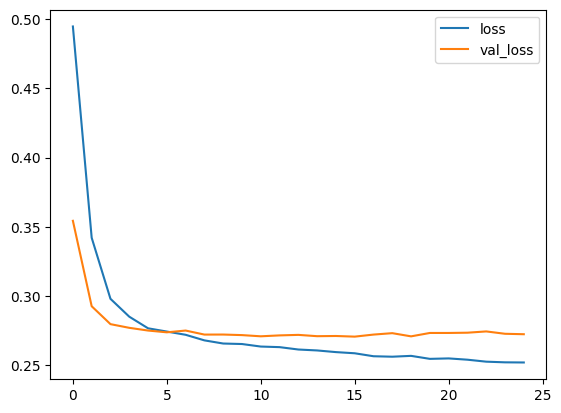

In [173]:
losses[['loss','val_loss']].plot()

Save Model and predict for new customer if you give credit or not

In [177]:
from tensorflow.keras.models import load_model
model.save('full_data_project_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Abschnitt 3: Evaluation der Leistung des Modells

**AUFGABE: Plotte den loss der Validierung gegen den loss des Trainings.**

In [174]:
df.drop('')

KeyError: "[''] not found in axis"

In [ ]:
df['loan_repaid']

In [ ]:
df.isnull().sum() / len(df) *100

In [ ]:
'10+ years'[:3]


In [ ]:
'1 year'[:3]

In [ ]:
data_info.columns